>先行数据分析

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
加州天然气 = pd.read_excel('加州/加州天然气.xlsx', index_col=0)
加州天然气

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
chart,,,,,,,,,,,
show_chart,2024-07-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,9.87,$/MCF
show_chart,2024-06-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,9.07,$/MCF
show_chart,2024-05-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,9.11,$/MCF
show_chart,2024-04-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,11.30,$/MCF
show_chart,2024-03-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,13.19,$/MCF
...,...,...,...,...,...,...,...,...,...,...,...
show_chart,2001-05-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,7.53,$/MCF
show_chart,2001-04-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,10.06,$/MCF
show_chart,2001-03-01,SCA,CALIFORNIA,EPG0,Natural Gas,PIN,Industrial Price,N3035CA3,California Natural Gas Industrial Price (Dolla...,9.84,$/MCF


In [3]:
import pandas as pd
加州工业电价数据 = pd.read_excel('加州/加州工业电价数据.xlsx', index_col=0)
加州工业电价数据 

,stateid,stateDescription,sectorid,sectorName,price,price-units,Unnamed: 7
period,,,,,,,
show_chart,2024-07-01,CA,California,IND,industrial,26.12,cents per kilowatt-hour
show_chart,2024-06-01,CA,California,IND,industrial,22.54,cents per kilowatt-hour
show_chart,2024-05-01,CA,California,IND,industrial,21.23,cents per kilowatt-hour
show_chart,2024-04-01,CA,California,IND,industrial,19.30,cents per kilowatt-hour
show_chart,2024-03-01,CA,California,IND,industrial,18.96,cents per kilowatt-hour
...,...,...,...,...,...,...,...
show_chart,2001-05-01,CA,California,IND,industrial,8.05,cents per kilowatt-hour
show_chart,2001-04-01,CA,California,IND,industrial,7.58,cents per kilowatt-hour
show_chart,2001-03-01,CA,California,IND,industrial,7.70,cents per kilowatt-hour


In [4]:
加州工业电价和天然气价格 = pd.merge(加州天然气,加州工业电价数据,left_on="period",right_on="stateid",how="left")
加州工业电价和天然气价格  = 加州工业电价和天然气价格[["period","price-units","value"]]
加州工业电价和天然气价格=加州工业电价和天然气价格.rename(columns={"period":'time',"price-units":'electricity-price',"value":'LNG-value'})
加州工业电价和天然气价格  = 加州工业电价和天然气价格.sort_values(by=['time'],ascending= True)
加州工业电价和天然气价格.to_csv("加州工业电价和天然气价格.csv",index=False)
加州工业电价和天然气价格

,time,electricity-price,LNG-value
282,2001-01-01,5.75,7.75
281,2001-02-01,7.70,9.34
280,2001-03-01,7.70,9.84
279,2001-04-01,7.58,10.06
278,2001-05-01,8.05,7.53
...,...,...,...
4,2024-03-01,18.96,13.19
3,2024-04-01,19.30,11.30
2,2024-05-01,21.23,9.11
1,2024-06-01,22.54,9.07


In [5]:
import  matplotlib.pyplot as plt

In [6]:
data = 加州工业电价和天然气价格

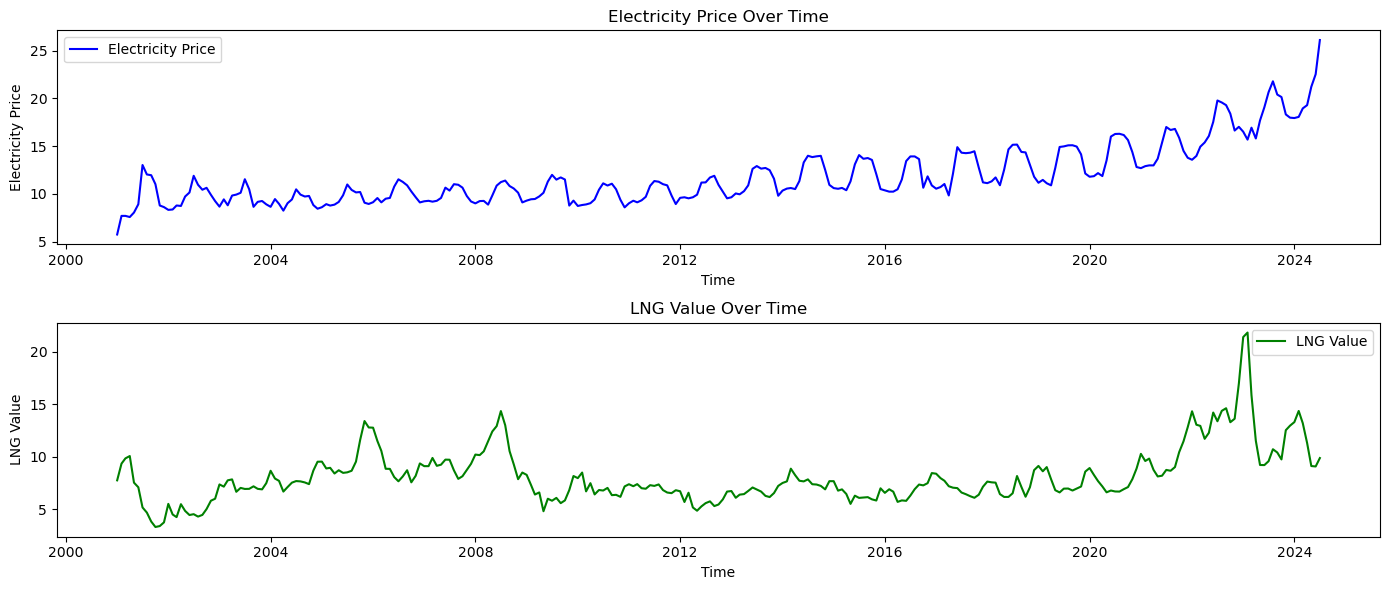

In [10]:
import matplotlib.pyplot as plt

# Convert 'time' to datetime format for easier plotting
data['time'] = pd.to_datetime(data['time'])

# Plot the electricity price and LNG value over time
plt.figure(figsize=(14, 6))

# Plot electricity price
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['electricity-price'], label='Electricity Price', color='blue')
plt.title('Electricity Price Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()

# Plot LNG value
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['LNG-value'], label='LNG Value', color='green')
plt.title('LNG Value Over Time')
plt.xlabel('Time')
plt.ylabel('LNG Value')
plt.legend()

plt.tight_layout()
plt.show()

